# 1. 회귀(Regression)
 - Dataset : NYC_taxi.csv
 - 거리에 따른 택시요금 예측
 - 조건) 뉴욕시 내에서 승차/하차의 경우만
 
# 2. 분류(Classification)
 - Dataset : diabetes.csv
 - 당뇨 발생 여부 (임의의 값 지정) - 당신은 당뇨에 걸릴 확률이 ㅇㅇ% 입니다.

In [1]:
# 모듈 로딩 ------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일 관련 변수 선언 --------------------------------------------
DIR_PATH='../Data1/'
FILE=DIR_PATH+'NYC_taxi.csv'
FILE1=DIR_PATH+'diabetes.csv'

In [2]:
taxi = pd.read_csv(FILE, nrows=50000, parse_dates=['pickup_datetime'])
diabetes = pd.read_csv(FILE1)

# 택시

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [4]:
taxi.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

### 데이터 필드
 - id - 각 여행에 대한 고유 식별자
 - vendor_id - 여행 기록과 연결된 공급자를 나타내는 코드
 - pickup_datetime - 미터가 참여한 날짜 및 시간
 - dropoff_datetime - 미터가 분리된 날짜 및 시간
 - passenger_count - 차량의 승객 수 (운전자가 입력 한 값)
 - pickup_longitude - 미터가 관여 된 경도
 - pickup_latitude - 미터가 관여 된 위도
 - dropoff_longitude - 미터가 분리된 경도
 - dropoff_latitude - 미터가 분리된 위도
 - store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되어 있지 않기 때문에 공급    업체에 전송하기 전에 트립 레코드가 차량 메모리에 보관되었는지 여부를 나타냅니다   -Y=저장 및 전달; N = 상점이 아니며 앞으로 여행
 - trip_duration - 여행 기간(초)

In [5]:
taxi.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
# 거리
distance = ((taxi.pickup_latitude - taxi.dropoff_latitude)**2 + (taxi.pickup_longitude - taxi.dropoff_longitude)**2)**0.5
type(distance)
taxi['distance'] = distance

# 위도: 40.6643, 경도: -73.9385

In [7]:
# plt.figure(figsize=(10,5))
# plt.scatter(taxi.pickup_longitude, taxi.pickup_latitude)
# plt.xlabel('startlong')
# plt.ylabel('startlati')
# plt.show()

In [8]:
# plt.figure(figsize=(10,5))
# plt.scatter(taxi.dropoff_longitude, taxi.dropoff_latitude)
# plt.xlabel('endlong')
# plt.ylabel('endlati')
# plt.show()

In [9]:
taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


In [10]:
taxi.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance                         float64
dtype: object

In [11]:
taxi = taxi[(taxi['passenger_count']>0) & (taxi['fare_amount']>0)]
taxi = taxi[(taxi['pickup_longitude']>=-74.30) & (taxi['pickup_longitude']<=-73.69)]
taxi = taxi[(taxi['dropoff_longitude']>=-74.30) & (taxi['dropoff_longitude']<=-73.69)]
taxi = taxi[(taxi['pickup_latitude']>=40.50) & (taxi['pickup_latitude']<=40.92)]
taxi = taxi[(taxi['dropoff_latitude']>=40.50) & (taxi['dropoff_latitude']<=40.92)]

In [12]:
taxi_distance = taxi['distance']
taxi_fare_amount = taxi['fare_amount']

In [13]:
print(max(taxi_distance))
print(min(taxi_distance))

0.3989352298418854
0.0


In [14]:
print(max(taxi_fare_amount))
print(min(taxi_fare_amount))

165.0
0.01


In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
np.array(taxi_distance), np.array(taxi_fare_amount), random_state=42)

# print(train_input.shape)
# print(test_input.shape)
# train_input = train_input.reshape(-1, 1)
# test_input = test_input.reshape(-1, 1)
# print(train_input.shape)
# print(test_input.shape)

In [17]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape)
print('---------------------')
print(test_poly.shape)

(36531, 2)
---------------------
(12177, 2)


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)

[-22.7642299  219.87060308] 3.9037421879179925


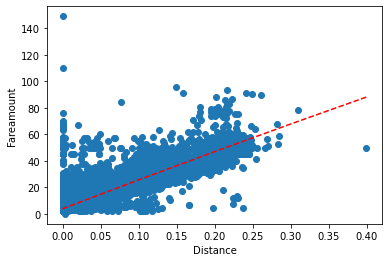

In [19]:
point = np.arange(0.0, 0.5, 0.1)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
plt.xlabel('Distance')
plt.ylabel('Fareamount')

# 방정식 그래프 그리기
plt.plot(point, -22.7642299*point**2 +219.87060308*point +3.9037421879179925,
        color='red', linestyle='--')

# print(lr.score(train_poly, train_target))
# print(lr.score(test_poly, test_target))
plt.show()

## 당뇨

In [20]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
# preDiabetes = model.predict_proba([[10,140,70,35,100,33,0.600,60]])

In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [25]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
data = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = diabetes[['Outcome']]

In [27]:
# arr_data = np.array(data)
# arr_target = np.array(target)

In [28]:
# print(arr_data)
# print(arr_target)

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size= 0.2, stratify = target, random_state=42)

# train_input, test_input, train_target, test_target = train_test_split(
#     arr_data, arr_target, test_size= 0.2, stratify = target, random_state=42) # test_size= 0.2,stratify = target

# print(train_input.shape)
# print(test_input.shape)
# train_input = train_input.reshape(-1, 1)
# test_input = test_input.reshape(-1, 1)
# print(train_input.shape)
# print(test_input.shape)
# print(arr_data.shape)
# print(arr_target.shape)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_input, train_target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.score(test_input, test_target)

0.7142857142857143

In [32]:
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
preDiabetes = model.predict_proba([[10,140,70,35,100,33,0.600,60]])
preDiabetes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.23657147, 0.76342853]])

In [33]:
print('분류 종류 : ', model.classes_)
print('가중치 값 : ', model.coef_)
print('절 편 값 : ', model.intercept_)
print('특성 갯수 : ', model.n_features_in_)

print('trainset 점수: ', model.score(train_input,train_target))
print('testset 점수 : ', model.score(test_input,test_target))

분류 종류 :  [0 1]
가중치 값 :  [[ 0.11627071  0.03794632 -0.01104375  0.00484952 -0.00137897  0.09060614
   0.84803621  0.01456187]]
절 편 값 :  [-8.93493388]
특성 갯수 :  8
trainset 점수:  0.7931596091205212
testset 점수 :  0.7142857142857143
